In [1]:
import numpy as np
import pandas as pd
import folium

In [3]:
df = pd.read_csv('SF_crimes.csv')

In [10]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [5]:
import ipywidgets as widgets

style = {'description_width': 'initial'}

limit_case = widgets.IntSlider(
    value=1000,
    min=100,
    max=5000,
    step=1,
    description='Max Number of Case:',
    disabled=False,
    style=style)

In [6]:
unique_district = df.PdDistrict.unique()

In [7]:
unique_cat = df.Category.unique()

In [8]:
unique_district

array(['SOUTHERN', 'BAYVIEW', 'TENDERLOIN', 'MISSION', 'NORTHERN',
       'TARAVAL', 'INGLESIDE', 'CENTRAL', 'RICHMOND', 'PARK', nan],
      dtype=object)

In [9]:
unique_cat

array(['WEAPON LAWS', 'WARRANTS', 'NON-CRIMINAL', 'ASSAULT',
       'OTHER OFFENSES', 'MISSING PERSON', 'LARCENY/THEFT', 'BURGLARY',
       'STOLEN PROPERTY', 'ROBBERY', 'FRAUD', 'DRUG/NARCOTIC',
       'VEHICLE THEFT', 'RECOVERED VEHICLE', 'VANDALISM', 'ARSON',
       'PROSTITUTION', 'SECONDARY CODES', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'TRESPASS', 'SEX OFFENSES, NON FORCIBLE', 'SEX OFFENSES, FORCIBLE',
       'RUNAWAY', 'KIDNAPPING', 'DISORDERLY CONDUCT',
       'DRIVING UNDER THE INFLUENCE', 'FORGERY/COUNTERFEITING',
       'EMBEZZLEMENT', 'BRIBERY', 'FAMILY OFFENSES', 'GAMBLING',
       'SUICIDE', 'LIQUOR LAWS', 'EXTORTION', 'LOITERING', 'TREA',
       'BAD CHECKS', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

In [11]:
from ipywidgets import Layout



district = widgets.SelectMultiple(
    options = unique_district.tolist(),
    value = ['BAYVIEW', 'NORTHERN'],
    #rows=10,
    description='District',
    disabled=False,
    layout = Layout(width='50%', height='80px')
)

category = widgets.SelectMultiple(
    options = unique_cat.tolist(),
    value = ['VANDALISM', 'ASSAULT', 'ROBBERY'],
    #rows=10,
    description='Criminal Case',
    disabled=False,
    style=style,
    layout = Layout(width='50%', height='80px')
)

In [14]:
import matplotlib.pyplot as plt
from folium import plugins

def update_map(district, category, limit):
    
    df = pd.read_csv('SF_crimes.csv')
    df = df.iloc[0:limit, :]
    
    latitude = 37.77
    longitude = -122.42
    
    df_dist = df.loc[df['PdDistrict'].isin(np.array(district))]
    df_category = df_dist.loc[df_dist['Category'].isin(np.array(category))]
    
    cat_unique = df_category['Category'].value_counts()
    cat_unique = cat_unique.reset_index()
    
    dist_unique = df_category['PdDistrict'].value_counts()
    dist_unique = dist_unique.reset_index()
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

    # create map and display it
    sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

    
    incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
    for lat, lng, label, in zip(df_category.Y, df_category.X, df_category.Category):
        folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
        ).add_to(incidents)
# show map
    display(sanfran_map)
    
    ax1.bar(cat_unique['index'], cat_unique['Category'])
    ax1.set_title('Amount of Criminal Case Based on Category')
    ax2.bar(dist_unique['index'], dist_unique['PdDistrict'])
    ax2.set_title('Amount of Criminal Case in Selected District')
    
    plt.show()

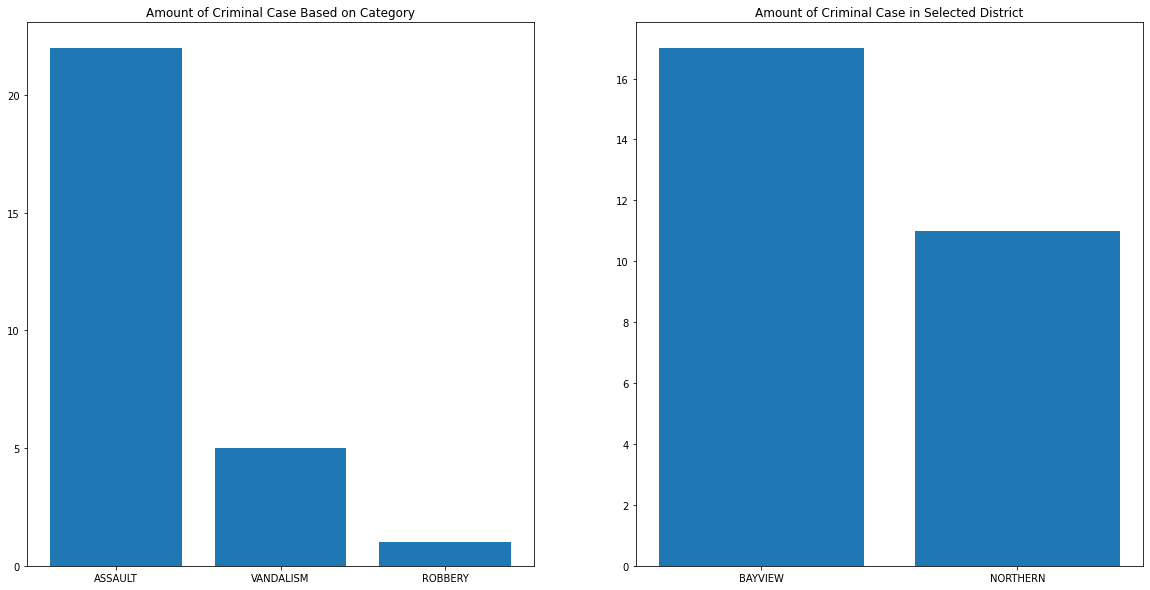

In [16]:
widgets.interactive(update_map, district = district, category = category, limit=limit_case)